<a href="https://colab.research.google.com/github/Ahmadar91/ML/blob/main/Lab_4_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [15]:
%pip install matplotlib 
%pip install pandas 
%pip install torch 
%pip install torchvision

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/7a/94/a1615bac6706eb8a58fe08675b80a11b5463ef9591176dd3e57257495774/matplotlib-3.8.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/55/14/0dc1884e3c04f9b073a47283f5d424926644250891db392a07c56f05e5c5/contourpy-1.1.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/2b/b3/70c33027c4918c10ccf176014b38f8b91cb18ac018a78854543a4fc72609/cycler-0.12.0-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/62/a9/3d69ec0b1ec02829af67afe378576ad58257004d157d0a70ac29f7cf9a67/fonttools-4.43.0-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/155.0 kB ? eta -:--:--
     ------- ------------------------------- 30.7/155.0 kB 1.4 MB/s e

In [30]:
from pandas import *
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt


 


In [44]:
n_epochs = 20
batch_size_train = 64
batch_size_test = 10000
learning_rate = 0.01
momentum = 0.5


In [32]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader =  torch.utils.data.DataLoader(train_set, batch_size=batch_size_train, shuffle=True)

test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size_test, shuffle=False)


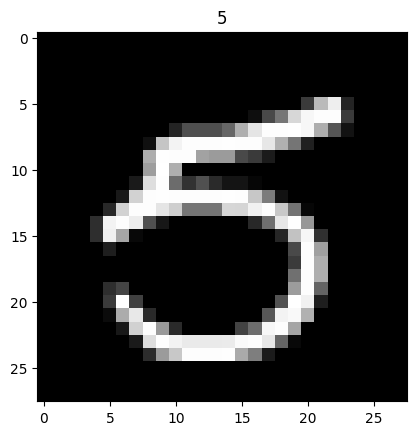

In [33]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

image = images[0]
label = labels[0]

image = image * 0.5 + 0.5

image = image.numpy()

plt.imshow(image.squeeze(), cmap='gray')

plt.title(str(label.item()))

plt.show()


In [34]:
class MyCNN(nn.Module):
    def __init__(self, kernel_size=2):
        super(MyCNN, self).__init__()
        self.kernel_size = kernel_size
        input_size = 28
        con_stride=1
        print(self.kernel_size)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=self.kernel_size)
        conv_out_size = (input_size - self.kernel_size)  + 1
        print(f"conv_out_size: {conv_out_size}")
        self.pool = nn.MaxPool2d(2,2)
        pool_out_size = conv_out_size // 2 # this is wrong related to padding
        print(f"pool_out_size: {pool_out_size}")
        input_size_after_conv_and_pool = 16 * pool_out_size * pool_out_size
        self.fc1 = nn.Linear(input_size_after_conv_and_pool , 32)
        #self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        #print(x.shape)
        #x = x.view(-1, np.product(x.shape[1:])) # not working
        #x = x.view(-1, np.product(x.shape)) # not working
        x = x.view(x.size(0), -1) # works
        #x= x.reshape(x.size(0),-1) # works
        x = F.relu(self.fc1(x))
        x = self.fc3(x)
        #print('test here ',np.shape(x))
        #x = F.relu(self.fc2(x))
        return x

In [22]:
class MyCNN(nn.Module):
    def __init__(self, kernel_size=2):
        super(MyCNN, self).__init__()
        self.kernel_size = kernel_size
        input_size = 28
        print(self.kernel_size)
        ouput_channels_value = 16
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=ouput_channels_value, kernel_size=self.kernel_size)
        conv_out_size = (input_size - self.kernel_size)  + 1
        print(f"conv_out_size: {conv_out_size}")
        self.pool = nn.MaxPool2d(2,2)
        pool_out_size = conv_out_size // 2
        print(f"pool_out_size: {pool_out_size}")
        input_size_after_conv_and_pool = ouput_channels_value * pool_out_size * pool_out_size

        self.fc1 = nn.Linear(input_size_after_conv_and_pool, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(x.size(0), -1)  # Flatten the tensor before passing it to the fully connected layer
        x = F.relu(self.fc1(x))  # Apply ReLU after the fully connected layer `fc1`
        x = self.fc3(x)  # `fc3` should be the last layer in the forward pass
        return x


In [48]:
trainAccuracy = list()
testAccuracy = list()

model = MyCNN(5)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)




5
conv_out_size: 24
pool_out_size: 12


In [49]:

def train(model, train_loader, criterion, optimizer):
    model.train()
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    return train_accuracy

def test(model, test_loader):
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = 100 * correct_test / total_test
    return test_accuracy


for epoch in range(n_epochs):
    train_accuracy = train(model, train_loader, criterion, optimizer)
    trainAccuracy.append(train_accuracy)

    test_accuracy = test(model, test_loader)
    testAccuracy.append(test_accuracy)

    print(f'Epoch {epoch+1}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

print('Finished Training')


Epoch 1, Train Accuracy: 86.07%, Test Accuracy: 93.94%
Epoch 2, Train Accuracy: 95.09%, Test Accuracy: 96.87%
Epoch 3, Train Accuracy: 96.98%, Test Accuracy: 97.59%
Epoch 4, Train Accuracy: 97.68%, Test Accuracy: 98.02%
Epoch 5, Train Accuracy: 98.09%, Test Accuracy: 97.92%
Epoch 6, Train Accuracy: 98.29%, Test Accuracy: 98.28%
Epoch 7, Train Accuracy: 98.51%, Test Accuracy: 98.49%
Epoch 8, Train Accuracy: 98.63%, Test Accuracy: 98.37%
Epoch 9, Train Accuracy: 98.75%, Test Accuracy: 98.48%
Epoch 10, Train Accuracy: 98.84%, Test Accuracy: 98.63%
Epoch 11, Train Accuracy: 98.89%, Test Accuracy: 98.55%
Epoch 12, Train Accuracy: 98.97%, Test Accuracy: 98.60%
Epoch 13, Train Accuracy: 99.07%, Test Accuracy: 98.67%
Epoch 14, Train Accuracy: 99.11%, Test Accuracy: 98.72%
Epoch 15, Train Accuracy: 99.17%, Test Accuracy: 98.80%
Epoch 16, Train Accuracy: 99.28%, Test Accuracy: 98.81%
Epoch 17, Train Accuracy: 99.30%, Test Accuracy: 98.63%
Epoch 18, Train Accuracy: 99.32%, Test Accuracy: 98.68%
E

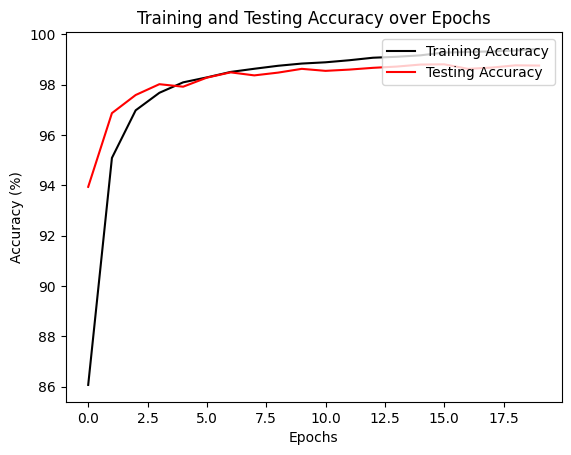

In [50]:



plt.plot(trainAccuracy, 'k', label='Training Accuracy')
plt.plot(testAccuracy, 'r', label='Testing Accuracy')

plt.title('Training and Testing Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(loc='upper right')

plt.show()


2
conv_out_size: 27
pool_out_size: 13
Epoch 1, Train Accuracy: 85.04%, Test Accuracy: 91.37%
Epoch 2, Train Accuracy: 92.20%, Test Accuracy: 93.68%
Epoch 3, Train Accuracy: 94.30%, Test Accuracy: 94.84%
Epoch 4, Train Accuracy: 95.83%, Test Accuracy: 95.94%
Epoch 5, Train Accuracy: 96.63%, Test Accuracy: 96.85%
Epoch 6, Train Accuracy: 97.19%, Test Accuracy: 97.09%
Epoch 7, Train Accuracy: 97.57%, Test Accuracy: 97.19%
Epoch 8, Train Accuracy: 97.78%, Test Accuracy: 97.36%
Epoch 9, Train Accuracy: 97.98%, Test Accuracy: 97.48%
Epoch 10, Train Accuracy: 98.15%, Test Accuracy: 97.70%
Epoch 11, Train Accuracy: 98.28%, Test Accuracy: 97.54%
Epoch 12, Train Accuracy: 98.39%, Test Accuracy: 97.62%
Epoch 13, Train Accuracy: 98.54%, Test Accuracy: 97.83%
Epoch 14, Train Accuracy: 98.59%, Test Accuracy: 97.95%
Epoch 15, Train Accuracy: 98.72%, Test Accuracy: 97.99%
Epoch 16, Train Accuracy: 98.80%, Test Accuracy: 97.88%
Epoch 17, Train Accuracy: 98.86%, Test Accuracy: 98.06%
Epoch 18, Train Acc

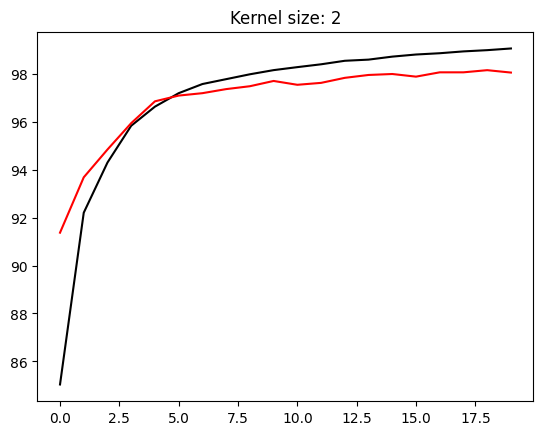

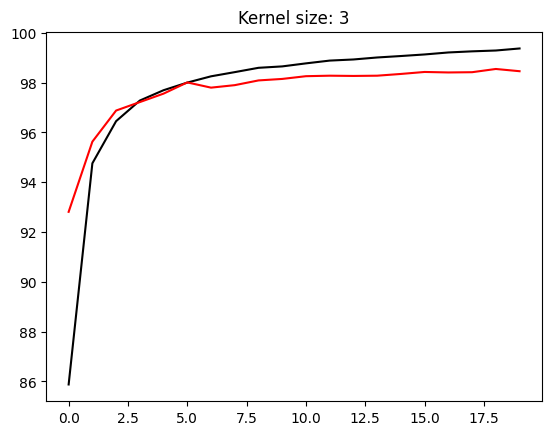

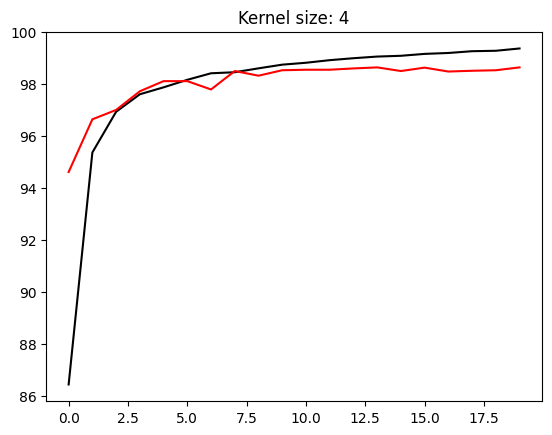

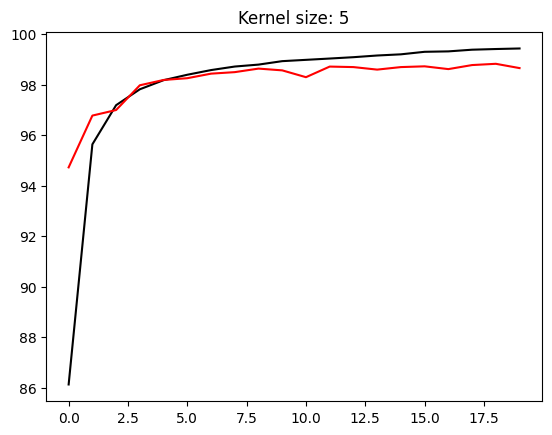

In [51]:
kernelSizes=[2,3,4,5]

for kernelSize in kernelSizes:
    trainAccuracy=list()
    testAccuracy=list()
    #instantiate your CNN using kernel size
    trainAccuracy = list()
    testAccuracy = list()

    model = MyCNN(kernelSize)
    #define optimizer and loss function
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
    criterion = nn.CrossEntropyLoss()

    #train and test - you can copy the code
    for epoch in range(n_epochs):
        train_accuracy = train(model, train_loader, criterion, optimizer)
        trainAccuracy.append(train_accuracy)

        test_accuracy = test(model, test_loader)
        testAccuracy.append(test_accuracy)

        print(f'Epoch {epoch+1}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

    print('Finished Training')
    #now plot this
    plt.plot(trainAccuracy, 'k', label='Training Accuracy')
    plt.plot(testAccuracy, 'r', label='Testing Accuracy')
    title("Kernel size: "+str(kernelSize))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend(loc='upper right')
    plt.show()

